In [11]:
# Import dependencies
import pandas as pd
import numpy as np # linear algebra

import matplotlib.pyplot as plt
from builtins import list
import matplotlib
matplotlib.style.use('ggplot')
import scipy.stats as st
import datetime
from sklearn import datasets
from scipy.stats import linregress

%matplotlib inline

In [12]:
uber_csv = "Resources/uber-rides-dataset.csv"

In [13]:
uber_df = pd.read_csv(uber_csv)

In [14]:
uber_df.head()

,trip_completed_at,trip_status,ride_hailing_app,trip_uid,driver_uid,rider_uid,customer,trip_start_time,trip_end_time,trip_time,...,distance_kms,temperature_time,temperature_value,feels_like,humidity,wind_speed,cloudness,weather_main,weather_desc,precipitation
0,"May 11, 2015 at 6:55PM",Completed,Uber,ee89076fd9da9bddf5f096b0ca42f8d5,05cfeb269e606247fe9d2b6082942c59,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,2015-05-11 17:26:00,2015-05-11 17:55:00,00:21:33,...,9.29,2015-05-11T17:26:00,12,12,0.69,4.81,0.78,partly-cloudy-day,Mostly Cloudy,none
1,"May 11, 2015 at 8:12PM",Completed,Uber,518be51d403944a03c47e8d1f2c87311,4a4e248742f9d5ff517c5bbbb48d0e54,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,2015-05-11 18:46:00,2015-05-11 19:12:00,00:19:27,...,9.93,2015-05-11T18:46:00,10,10,0.70,6.53,0.66,partly-cloudy-day,Mostly Cloudy,none
2,"May 13, 2015 at 11:38AM",Completed,Uber,6e460cc8a12c3c6568d0d4a67ac58393,cb249a2bd807ca78697b4ed0348c37da,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,2015-05-13 09:15:00,2015-05-13 10:38:00,01:06:53,...,18.01,2015-05-13T09:15:00,14,14,0.61,5.25,0.86,partly-cloudy-day,Mostly Cloudy,none
3,"May 16, 2015 at 1:44AM",Completed,Uber,49613a86a04e6c15d72b51d1a2935d81,d3f73f8151c2e8c34b541f961db7f5fa,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,2015-05-16 00:24:00,2015-05-16 00:44:00,00:13:37,...,5.10,2015-05-16T00:24:00,3,3,0.84,0.87,0.56,partly-cloudy-night,Partly Cloudy,none
4,"May 16, 2015 at 3:18AM",Completed,Uber,9896148fdecdb4c5d977a8691510bdb6,1287d21e6455ee40d4861f6b91c680f4,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,2015-05-16 01:29:00,2015-05-16 02:18:00,00:38:54,...,21.92,2015-05-16T01:29:00,3,1,0.90,1.61,0.31,partly-cloudy-night,Partly Cloudy,none


In [63]:
uber_df.columns

Index(['trip_completed_at', 'trip_status', 'ride_hailing_app', 'trip_uid',
       'driver_uid', 'rider_uid', 'customer', 'trip_start_time',
       'trip_end_time', 'trip_time', 'total_time', 'wait_time', 'trip_type',
       'surge_multiplier', 'vehicle_make_model', 'vehicle_license_plate',
       'driver_name_en', 'vehicle_make', 'vehicle_model', 'driver_gender',
       'driver_photo_url', 'driver_phone_number', 'pickup_lat', 'pickup_long',
       'dropoff_lat', 'dropoff_long', 'trip_map_image_url',
       'trip_path_image_url', 'city', 'country', 'trip_start_address',
       'trip_end_address', 'rub_usd_exchange_rate', 'price_rub', 'price_usd',
       'distance_kms', 'temperature_time', 'temperature_value', 'feels_like',
       'humidity', 'wind_speed', 'cloudness', 'weather_main', 'weather_desc',
       'precipitation'],
      dtype='object')

In [64]:
# Select the Columns we need
distance_type = uber_df.loc[:, ["distance_kms", "price_usd"]]

In [65]:
# Create the bins in which the distances will be held
bins = [0, 5, 10, 15, 20, 47]
#Create the names for the 5 bins
distance_names = ["Very Short Trip", "Short Trip", "Medium Trip", "Long trip", "Very Long Trip"]

In [66]:
# Assign the values to the bins
distance_type["Type of Distance"] = pd.cut(distance_type["distance_kms"], bins, labels=distance_names)
distance_type.head()

,distance_kms,price_usd,Type of Distance
238,6.12,3.12,Short Trip
213,3.22,2.16,Very Short Trip
37,3.07,2.59,Very Short Trip
36,3.35,3.65,Very Short Trip
389,34.13,10.84,Very Long Trip


In [67]:
# Calculate average price per distance bin
avg_price = distance_type.groupby(['Type of Distance'])["price_usd"].mean()
avg_price

Type of Distance
Very Short Trip     2.616343
Short Trip          3.871375
Medium Trip         5.554462
Long trip           8.565556
Very Long Trip     13.265588
Name: price_usd, dtype: float64

In [76]:
# Calculate the count per distance bin
count = distance_type.groupby(['Type of Distance']).count()
count

,distance_kms,price_usd
Type of Distance,,
Very Short Trip,175,175
Short Trip,269,269
Medium Trip,130,130
Long trip,36,36
Very Long Trip,68,68


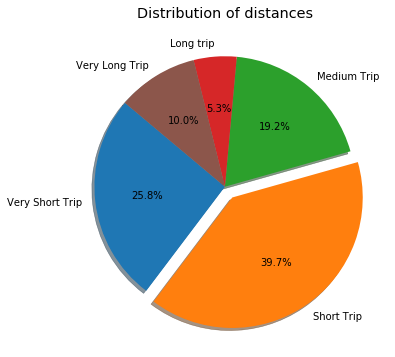

In [86]:
# Columns into arrays
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b"]
explode = (0, 0.1, 0, 0, 0)
plt.figure(figsize=(10,6))
plt.pie(count.distance_kms, labels=distance_names, explode=explode, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Distribution of distances")
plt.savefig('counttypesoftrip.png')
plt.show()

The above pie chart shows that majority of UBER trips done by the Russian customer is of short distance (5-9Km)

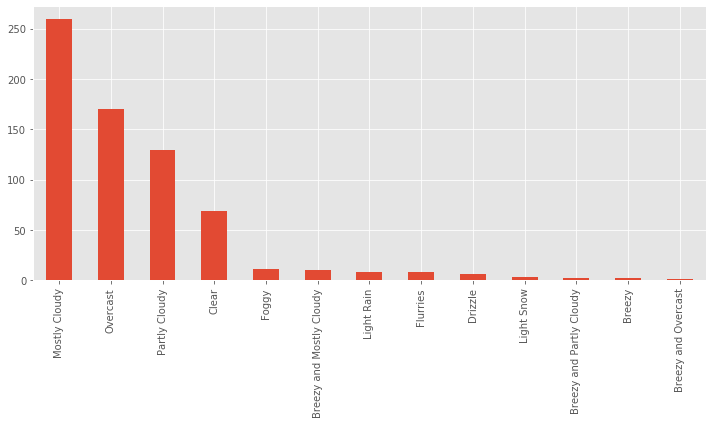

In [34]:
# Plot number of trips for each weather description
x = uber_df['weather_desc'].value_counts().plot(kind='bar', figsize = (10,6))
plt.tight_layout()
plt.savefig('weathercount.png')

The above bar chart shows the trip count for each type of weather. We can see that majority of trips were taken during mostly cloudy days.

The correlation between both factors is 0.08
The r-squared is: 0.07841863329131452


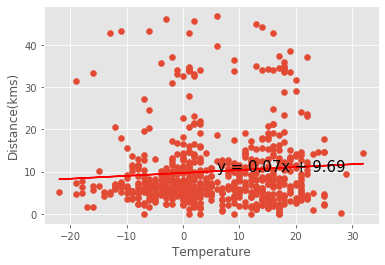

In [35]:
# Let's see if there is a correlation between temperature value and distance in kms. 
x_values = uber_df['temperature_value']
y_values = uber_df['distance_kms']
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="black")
plt.xlabel('Temperature')
plt.ylabel('Distance(kms)')
print(f"The r-squared is: {rvalue}")
plt.savefig('tempdistancecorr.png')
plt.show()

Based on the above graph there is no correlation between the temperature value and the distance in kms of Uber trips
since the correlation is only 0.08, very close to 0. The r-squared is also near 0 which means that only 7.8% of the
variance for the Distance (kms) can be explained by the temperature.

In [36]:
# sorting the sata by weather_desc
uber_df = uber_df.sort_values(by='weather_desc', ascending=True)

In [37]:
# Value counts for weather description
weather_count = uber_df.groupby(['weather_desc']).size()
weather_count

weather_desc
Breezy                        2
Breezy and Mostly Cloudy     10
Breezy and Overcast           1
Breezy and Partly Cloudy      2
Clear                        69
Drizzle                       6
Flurries                      8
Foggy                        11
Light Rain                    8
Light Snow                    3
Mostly Cloudy               259
Overcast                    170
Partly Cloudy               129
dtype: int64

In [38]:
avg_temp = uber_df.groupby(['weather_desc'])["temperature_value"].mean()
avg_temp

weather_desc
Breezy                      12.500000
Breezy and Mostly Cloudy    12.300000
Breezy and Overcast         -2.000000
Breezy and Partly Cloudy    18.000000
Clear                       11.579710
Drizzle                      9.333333
Flurries                    -3.125000
Foggy                        0.000000
Light Rain                  11.750000
Light Snow                  -7.666667
Mostly Cloudy                5.471042
Overcast                     0.658824
Partly Cloudy                7.751938
Name: temperature_value, dtype: float64

The correlation between both factors is -0.05
The r-squared is: -0.04999108723490653


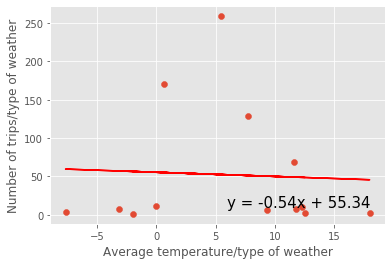

In [39]:
# let's then calculate the correlation between the trip frequency and the average temperature value
x_values = avg_temp
y_values = weather_count
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="black")
plt.xlabel('Average temperature/type of weather')
plt.ylabel('Number of trips/type of weather')
print(f"The r-squared is: {rvalue}")
plt.savefig('avgtempweathercorr.png')
plt.show()

Based on the above graph there is no correlation between the trip frequency and the average temperature value
since the correlation is only -0.05, very close to 0. The r-squared is also near 0 which means that only 5% of the
variance for the trip frequency can be explained by the temperature.

The correlation between both factors is 0.73
The r-squared is: 0.7256684388953664


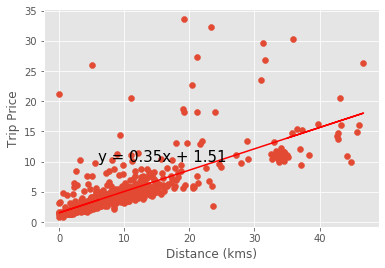

In [40]:
# Let's see if there is a correlation between distance and pricing. 
x_values = uber_df['distance_kms']
y_values = uber_df['price_usd']
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="black")
plt.xlabel('Distance (kms)')
plt.ylabel('Trip Price')
print(f"The r-squared is: {rvalue}")
plt.savefig('distanceprice.png')
plt.show()

Based on the above scatter plot there is a moderate correlation between the distance in kms and the trip fare since the correlation number is 0.73, closer to 1. The r-squared is also near 1 which means that 72.6% of the
variance for the trip fare can be explained by the distance in kms. The linear equation shows a positive linear regression line between the 2 variables, which means that an increase in the distance in kms corresponds to an increase in the trip fare.

In [41]:
# Create pie plot for the vehicle make model
vehicle_count = pd.DataFrame(uber_df.groupby(["vehicle_make_model"]).count()).reset_index()
vehicle_count.head()

,vehicle_make_model,trip_completed_at,trip_status,ride_hailing_app,trip_uid,driver_uid,rider_uid,customer,trip_start_time,trip_end_time,...,distance_kms,temperature_time,temperature_value,feels_like,humidity,wind_speed,cloudness,weather_main,weather_desc,precipitation
0,Audi A3,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1,Audi A6,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
2,Audi A7,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
3,Audi Q3,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
4,BMW 5-series,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [42]:
# Filter the DataFrame down only to those columns to chart
vehicle_count = vehicle_count[["vehicle_make_model","driver_uid"]]
vehicle_count = vehicle_count.rename(columns={"driver_uid": "Count"})
vehicle_count.head()

,vehicle_make_model,Count
0,Audi A3,2
1,Audi A6,4
2,Audi A7,2
3,Audi Q3,2
4,BMW 5-series,4


In [43]:
# Sort data in descending order
vehicle_count = vehicle_count.sort_values('Count', ascending=False)


In [44]:
# the top 5
top_five = vehicle_count[:5].copy()
top_five

,vehicle_make_model,Count
40,Hyundai Solaris,104
115,Volkswagen Polo,61
49,Kia Rio,43
25,Ford Focus,35
67,Nissan Almera,33


In [45]:
# Other vehicles
other_vehicles = pd.DataFrame(data = {
    'vehicle_make_model' : ['others'],
    'Count' : [vehicle_count['Count'][5:].sum()]
})
other_vehicles

,vehicle_make_model,Count
0,others,402


In [46]:
# Combining top 5 with others
top_five_others = pd.concat([top_five, other_vehicles])
top_five_others

,vehicle_make_model,Count
40,Hyundai Solaris,104
115,Volkswagen Polo,61
49,Kia Rio,43
25,Ford Focus,35
67,Nissan Almera,33
0,others,402


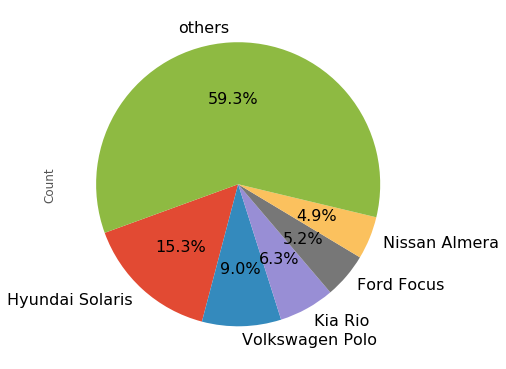

In [47]:
#plotting the 5 top vehicles with the others
plt.figure(figsize=(14,10))
ax1 = plt.subplot(121, aspect='equal')
top_five_others.plot(kind='pie', y = "Count", ax=ax1, autopct='%1.1f%%', 
 startangle=200, shadow=False, labels=top_five_others['vehicle_make_model'], legend = False, fontsize=16)
plt.savefig('vehicletop5.png')

The above pie chart shows the top 5 vehicle make models used by UBER drivers in Russia. 
The 1st one is the Hyunday Solaris, a south Korean car, which is sold as Hyundai Accent in the USA. For the Russian market it is assembled by the TagAZ plant in Taganrog.
The 2nd one is the Volkswagen Polo, a car produced by the German manufacturer Volkswagen since 1975.
The 3rd one is Kia Rio, another South Korean car.

In [48]:
# Set Index to vehicle make model
top_five = top_five.set_index("vehicle_make_model")


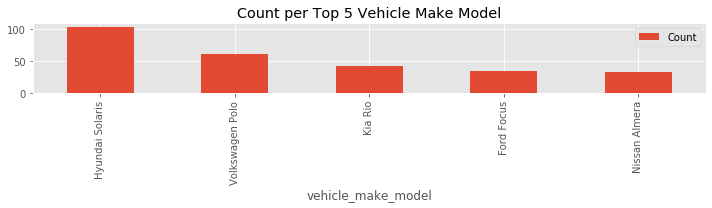

In [49]:
# Plot a bar chart with the same information
top_five.plot(kind="bar", figsize=(10,3))

# Set a title for the chart
plt.title("Count per Top 5 Vehicle Make Model")

plt.tight_layout()
plt.savefig('vehiclecount.png')
plt.show()

In [50]:
# Select the columns needed
prices_box = uber_df.loc[:, ["city", "price_usd", "distance_kms"]]
prices_box["price/km"] = prices_box["price_usd"]/prices_box["distance_kms"]
prices_box.head()

,city,price_usd,distance_kms,price/km
238,Saint Petersburg,3.12,6.12,0.509804
213,Saint Petersburg,2.16,3.22,0.670807
37,Saint Petersburg,2.59,3.07,0.843648
36,Saint Petersburg,3.65,3.35,1.089552
389,Saint Petersburg,10.84,34.13,0.317609


In [51]:
# Sort data by city
df = prices_box.sort_values(['city','price/km'],ascending=True).groupby('city').head().reset_index()

In [52]:
df.describe

<bound method NDFrame.describe of     index              city  price_usd  distance_kms  price/km
0      53      Ekaterinburg       5.91         23.44  0.252133
1      15      Ekaterinburg       2.21          8.40  0.263095
2     123      Ekaterinburg       5.54         20.58  0.269193
3      64      Ekaterinburg       5.90         17.77  0.332020
4      54      Ekaterinburg       5.91         16.38  0.360806
5     362            Moscow       4.98         13.33  0.373593
6     600            Moscow      14.71         35.79  0.411009
7     601            Moscow      20.59         43.15  0.477173
8     356            Moscow       7.68         14.18  0.541608
9     361            Moscow       3.00          4.73  0.634249
10    199  Saint Petersburg       2.63         23.70  0.110970
11    339  Saint Petersburg       9.93         44.90  0.221158
12     48  Saint Petersburg      10.84         44.22  0.245138
13    206  Saint Petersburg       9.38         37.16  0.252422
14    175  Saint Pete

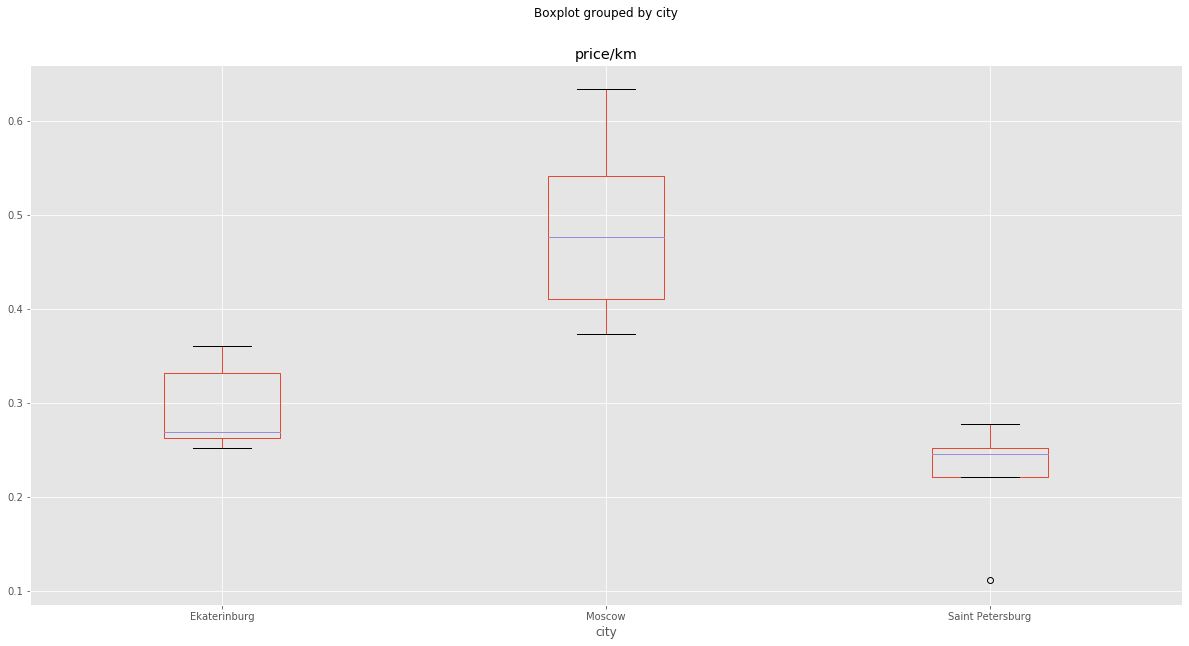

In [53]:
# Create a boxplot to compare prices in the 3 Russian cities
df.boxplot("price/km", by="city", figsize=(20, 10))
plt.savefig('boxplots.png')

In [54]:
# Extract individual groups
group1 = prices_box[prices_box["city"] == "Saint Petersburg"]["price_usd"]
group2 = prices_box[prices_box["city"] == "Moscow"]["price_usd"]
group3 = prices_box[prices_box["city"] == "Ekaterinburg"]["price_usd"]

In [55]:

import scipy.stats as stats
# Perform the ANOVA
stats.f_oneway(group1, group2, group3)

F_onewayResult(statistic=4.256612398815152, pvalue=0.014552486743234457)

Since the p-value is less than 0.05, there is a significant difference between the mean prices of UBER rides in the 3 Russian cities.

In [56]:
# Calculate IQR of prices in Saint Petersburg
quartiles = group1.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of prices is: {lowerq}")
print(f"The upper quartile of prices is: {upperq}")
print(f"The interquartile range of prices is: {iqr}")
print(f"The the median of prices is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of prices is: 2.78
The upper quartile of prices is: 5.620000000000001
The interquartile range of prices is: 2.840000000000001
The the median of prices is: 3.75 
Values below -1.4800000000000018 could be outliers.
Values above 9.880000000000003 could be outliers.


In [57]:
# Calculate IQR of prices in Moscow
quartiles = group2.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of prices is: {lowerq}")
print(f"The upper quartile of prices is: {upperq}")
print(f"The interquartile range of prices is: {iqr}")
print(f"The the median of prices is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of prices is: 4.1775
The upper quartile of prices is: 9.555
The interquartile range of prices is: 5.3774999999999995
The the median of prices is: 6.665 
Values below -3.88875 could be outliers.
Values above 17.62125 could be outliers.


In [58]:
# Calculate IQR of prices in Ekaterinburg
quartiles = group3.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of prices is: {lowerq}")
print(f"The upper quartile of prices is: {upperq}")
print(f"The interquartile range of prices is: {iqr}")
print(f"The the median of prices is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of prices is: 2.1875
The upper quartile of prices is: 5.630000000000001
The interquartile range of prices is: 3.442500000000001
The the median of prices is: 2.665 
Values below -2.976250000000001 could be outliers.
Values above 10.793750000000003 could be outliers.
